<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(3_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,93.771760,61.382382,80.037372,72.629383,-528.844841,-211.023944,154.450234,-365.474178
1,0.0,1.0,97.273250,95.389927,46.337033,91.496976,186.994819,527.492006,474.540261,52.951744
2,0.0,2.0,85.436109,72.064254,77.839962,69.602865,684.316716,999.259906,410.138590,589.121315
3,0.0,3.0,49.962735,26.466925,91.858432,38.800166,-365.923460,-148.835202,-3.218016,-145.617186
4,0.0,4.0,58.321320,57.901760,26.123967,34.411950,-1494.401064,-1307.642068,-85.200576,-1222.441492
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.007403,92.094413,60.466503,52.378848,-845.417829,-596.470662,3.779810,-600.250472
19996,999.0,16.0,40.581001,46.106797,22.550997,31.646294,412.819907,563.704995,488.527549,75.177447
19997,999.0,17.0,94.196937,83.138007,89.073822,50.890757,-945.367998,-618.068475,59.339927,-677.408401
19998,999.0,18.0,47.445867,65.529732,60.451290,92.082617,-777.250015,-501.740508,646.969855,-1148.710363


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    93.771760  61.382382  80.037372  72.629383  -528.844841   
      1.0    97.273250  95.389927  46.337033  91.496976   186.994819   
      2.0    85.436109  72.064254  77.839962  69.602865   684.316716   
      3.0    49.962735  26.466925  91.858432  38.800166  -365.923460   
      4.0    58.321320  57.901760  26.123967  34.411950 -1494.401064   
...                ...        ...        ...        ...          ...   
999.0 15.0   34.007403  92.094413  60.466503  52.378848  -845.417829   
      16.0   40.581001  46.106797  22.550997  31.646294   412.819907   
      17.0   94.196937  83.138007  89.073822  50.890757  -945.367998   
      18.0   47.445867  65.529732  60.451290  92.082617  -777.250015   
      19.0   23.468051  63.331305  54.097369  23.992728   304.548030   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -211.023944  154.450234  -365.474178  
      1.0     527.492006  474.540261    52.951744  
      2.0     999.259906  410.138590   589.121315  
      3.0    -148.835202   -3.218016  -145.617186  
      4.0   -1307.642068  -85.200576 -1222.441492  
...                  ...         ...          ...  
999.0 15.0   -596.470662    3.779810  -600.250472  
      16.0    563.704995  488.527549    75.177447  
      17.0   -618.068475   59.339927  -677.408401  
      18.0   -501.740508  646.969855 -1148.710363  
      19.0    479.437483 -241.991855   721.429338  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    93.771760  61.382382  80.037372  72.629383  -528.844841   
      1.0    97.273250  95.389927  46.337033  91.496976   186.994819   
      2.0    85.436109  72.064254  77.839962  69.602865   684.316716   
      3.0    49.962735  26.466925  91.858432  38.800166  -365.923460   
      4.0    58.321320  57.901760  26.123967  34.411950 -1494.401064   
...                ...        ...        ...        ...          ...   
999.0 15.0   34.007403  92.094413  60.466503  52.378848  -845.417829   
      16.0   40.581001  46.106797  22.550997  31.646294   412.819907   
      17.0   94.196937  83.138007  89.073822  50.890757  -945.367998   
      18.0   47.445867  65.529732  60.451290  92.082617  -777.250015   
      19.0   23.468051  63.331305  54.097369  23.992728   304.548030   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -211.023944  154.450234  -365.474178  
      1.0     527.492006  474.540261    52.951744  
      2.0     999.259906  410.138590   589.121315  
      3.0    -148.835202   -3.218016  -145.617186  
      4.0   -1307.642068  -85.200576 -1222.441492  
...                  ...         ...          ...  
999.0 15.0   -596.470662    3.779810  -600.250472  
      16.0    563.704995  488.527549    75.177447  
      17.0   -618.068475   59.339927  -677.408401  
      18.0   -501.740508  646.969855 -1148.710363  
      19.0    479.437483 -241.991855   721.429338  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,93.771760,61.382382,80.037372,72.629383,-528.844841,-211.023944,154.450234,-365.474178
1,0.0,1.0,97.273250,95.389927,46.337033,91.496976,186.994819,527.492006,474.540261,52.951744
2,0.0,2.0,85.436109,72.064254,77.839962,69.602865,684.316716,999.259906,410.138590,589.121315
3,0.0,3.0,49.962735,26.466925,91.858432,38.800166,-365.923460,-148.835202,-3.218016,-145.617186
4,0.0,4.0,58.321320,57.901760,26.123967,34.411950,-1494.401064,-1307.642068,-85.200576,-1222.441492
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.007403,92.094413,60.466503,52.378848,-845.417829,-596.470662,3.779810,-600.250472
19996,999.0,16.0,40.581001,46.106797,22.550997,31.646294,412.819907,563.704995,488.527549,75.177447
19997,999.0,17.0,94.196937,83.138007,89.073822,50.890757,-945.367998,-618.068475,59.339927,-677.408401
19998,999.0,18.0,47.445867,65.529732,60.451290,92.082617,-777.250015,-501.740508,646.969855,-1148.710363


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    93.771760  61.382382  80.037372  72.629383  -528.844841   
      1.0    97.273250  95.389927  46.337033  91.496976   186.994819   
      2.0    85.436109  72.064254  77.839962  69.602865   684.316716   
      3.0    49.962735  26.466925  91.858432  38.800166  -365.923460   
      4.0    58.321320  57.901760  26.123967  34.411950 -1494.401064   
...                ...        ...        ...        ...          ...   
999.0 15.0   34.007403  92.094413  60.466503  52.378848  -845.417829   
      16.0   40.581001  46.106797  22.550997  31.646294   412.819907   
      17.0   94.196937  83.138007  89.073822  50.890757  -945.367998   
      18.0   47.445867  65.529732  60.451290  92.082617  -777.250015   
      19.0   23.468051  63.331305  54.097369  23.992728   304.548030   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -211.023944  154.450234  -365.474178  
      1.0     527.492006  474.540261    52.951744  
      2.0     999.259906  410.138590   589.121315  
      3.0    -148.835202   -3.218016  -145.617186  
      4.0   -1307.642068  -85.200576 -1222.441492  
...                  ...         ...          ...  
999.0 15.0   -596.470662    3.779810  -600.250472  
      16.0    563.704995  488.527549    75.177447  
      17.0   -618.068475   59.339927  -677.408401  
      18.0   -501.740508  646.969855 -1148.710363  
      19.0    479.437483 -241.991855   721.429338  

[20000 rows x 8 columns]

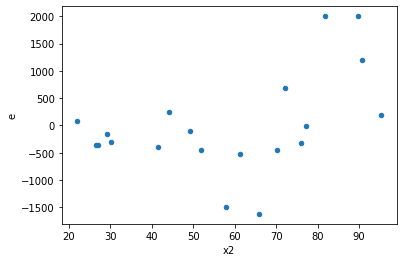

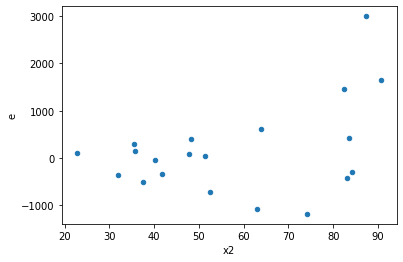

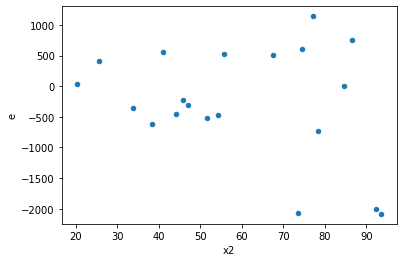

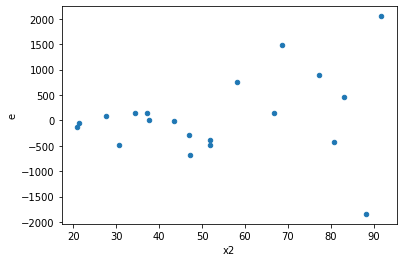

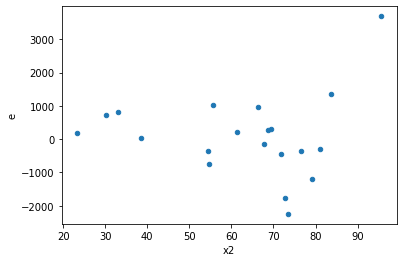

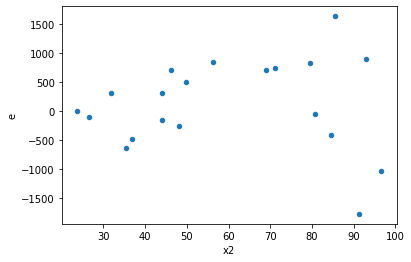

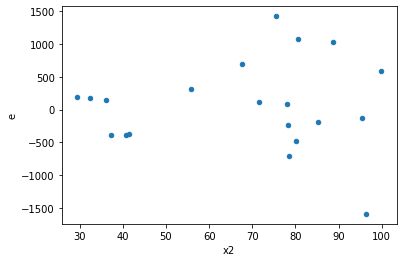

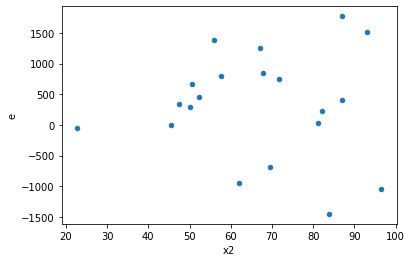

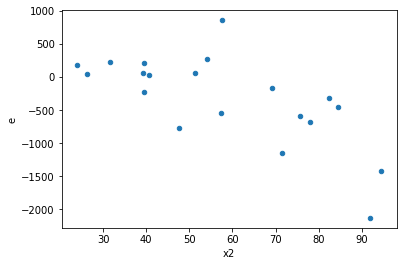

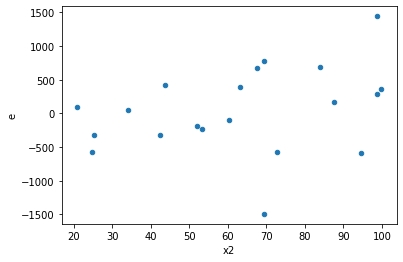

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,8.0,2873531.5835298747,7122281.275102342,718382.8958824687,890285.1593877927,1.2392905851330962,0.7354046701266621,0.632297664936669,0.36770233506333105,Reject001=1 : Homoscedasticity
2.0,4.0,8.0,293063.57686366263,11455074.044396134,73265.89421591566,1431884.2555495168,19.543667225704404,0.0006875857081787284,0.9996562071459106,0.0003437928540893642,Reject001=0 : Heteroscedasticity
3.0,7.0,5.0,2976631.0134445988,3685887.6642381535,425233.00192065694,737177.5328476307,1.733584951116232,0.563675848398248,0.718162075800876,0.281837924199124,Reject001=1 : Homoscedasticity
5.0,8.0,4.0,1514933.3861129398,3872717.950846625,189366.67326411747,968179.4877116563,5.112723749238054,0.13228313868639185,0.9338584306568041,0.06614156934319593,Reject001=1 : Homoscedasticity
6.0,4.0,8.0,1247984.5828648193,3277925.85678272,311996.14571620483,409740.73209784,1.313287800902979,0.6865220613660055,0.6567389693169973,0.34326103068300273,Reject001=1 : Homoscedasticity
7.0,7.0,5.0,1929199.6010619858,7557502.470381109,275599.9430088551,1511500.4940762217,5.484400604638938,0.07912527109903933,0.9604373644504803,0.039562635549519665,Reject001=1 : Homoscedasticity
14.0,8.0,4.0,1429734.9928987094,3162891.400226565,178716.87411233867,790722.8500566413,4.424444272450765,0.16741679529440656,0.9162916023527967,0.08370839764720328,Reject001=1 : Homoscedasticity
15.0,5.0,7.0,4441865.125176742,7429274.595616908,888373.0250353484,1061324.942230987,1.1946838910251207,0.7996737185429867,0.6001631407285066,0.3998368592714934,Reject001=1 : Homoscedasticity
17.0,3.0,9.0,140374.6834074524,3192576.8566179345,46791.561135817465,354730.7618464372,7.581084136449167,0.01559525589125399,0.992202372054373,0.007797627945626995,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,8.0,2873531.5835298747,7122281.275102342,718382.8958824687,890285.1593877927,1.2392905851330962,0.7354046701266621,Reject001=1 : Homoscedasticity
1.0,9.0,3.0,6619202.963085438,15284.32516251602,735466.995898382,5094.775054172006,0.006927265373680943,1.25758464491456e-07,Reject001=0 : Heteroscedasticity
2.0,4.0,8.0,293063.57686366263,11455074.044396134,73265.89421591566,1431884.2555495168,19.543667225704404,0.0006875857081787284,Reject001=0 : Heteroscedasticity
3.0,7.0,5.0,2976631.0134445988,3685887.6642381535,425233.00192065694,737177.5328476307,1.733584951116232,0.563675848398248,Reject001=1 : Homoscedasticity
4.0,9.0,3.0,6891292.840961488,10384.43829382029,765699.2045512764,3461.4794312734302,0.004520677846729598,1.9078933212671262e-08,Reject001=0 : Heteroscedasticity
5.0,8.0,4.0,1514933.3861129398,3872717.950846625,189366.67326411747,968179.4877116563,5.112723749238054,0.13228313868639185,Reject001=1 : Homoscedasticity
6.0,4.0,8.0,1247984.5828648193,3277925.85678272,311996.14571620483,409740.73209784,1.313287800902979,0.6865220613660055,Reject001=1 : Homoscedasticity
7.0,7.0,5.0,1929199.6010619858,7557502.470381109,275599.9430088551,1511500.4940762217,5.484400604638938,0.07912527109903933,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,2057571.6868102613,1720878.6175128187,342928.6144683769,286813.1029188031,0.8363638693826512,0.8338033905091747,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      765
Reject001=0 : Heteroscedasticity    235
Name: Result_test, dtype: int64